In [242]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor, Ridge

In [270]:
# Generate toy data.
rng = np.random.RandomState(0)
X, y = make_regression(n_samples=200, n_features=1, random_state=0, noise=4.0,
                       bias=100.0)

In [271]:
X.shape

(200, 1)

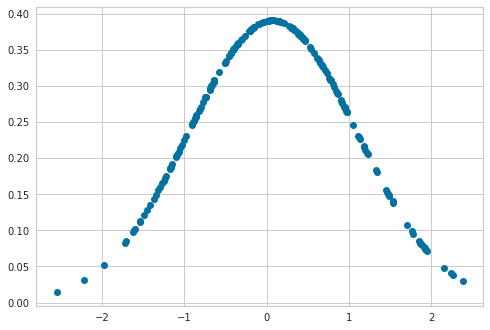

In [272]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

hmean = np.mean(X)
hstd = np.std(X)
pdf = stats.norm.pdf(X, hmean, hstd)
plt.plot(X, pdf, 'o') # including h here is crucial

In [273]:
# Add four strong outliers to the dataset.
X_outliers = rng.normal(0, 0.5, size=(4, 1))

X_outliers

array([[0.88202617],
       [0.2000786 ],
       [0.48936899],
       [1.1204466 ]])

In [274]:
X_outliers[:2,:]

array([[0.88202617],
       [0.2000786 ]])

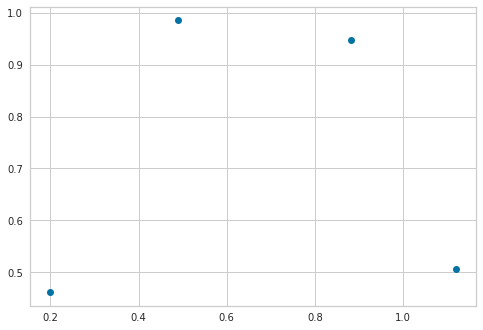

In [275]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

hmean = np.mean(X_outliers)
hstd = np.std(X_outliers)
pdf = stats.norm.pdf(X_outliers, hmean, hstd)
plt.plot(X_outliers, pdf, 'o') # including h here is crucial

In [276]:
y_outliers = rng.normal(0, 2.0, size=4)

y_outliers

array([ 3.73511598, -1.95455576,  1.90017684, -0.30271442])

In [277]:
X_outliers[:2, :] += X.max() + X.mean() / 4.
X_outliers[2:, :] += X.min() - X.mean() / 4.
y_outliers[:2] += y.min() - y.mean() / 4.
y_outliers[2:] += y.max() + y.mean() / 4.
X = np.vstack((X, X_outliers))
y = np.concatenate((y, y_outliers))
X.shape

(204, 1)

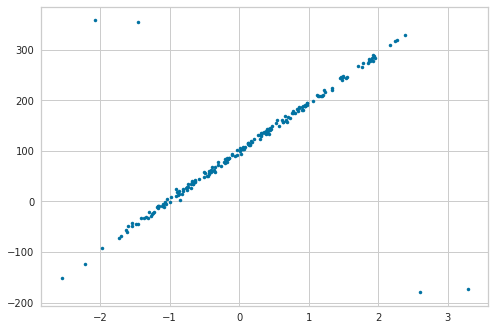

In [278]:
plt.plot(X, y, 'b.')

In [279]:
from scipy.stats import skewnorm
import matplotlib.pyplot as plt

In [280]:
a = -3
mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')

In [281]:
x = np.linspace(skewnorm.ppf(0.01, a),skewnorm.ppf(0.99, a), 100)

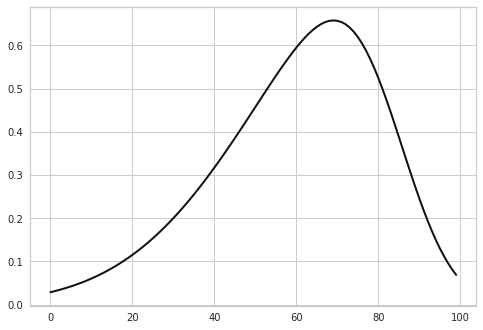

In [282]:
rv = skewnorm.pdf(x, a, 0, 1)

plt.plot(rv, 'k-', lw=2, label='frozen pdf')


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/huber.py:86: RuntimeWarning: invalid value encountered in double_scalars
  squared_loss = weighted_loss / sigma
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/huber.py:96: RuntimeWarning: divide by zero encountered in double_scalars
  2. / sigma * safe_sparse_dot(weighted_non_outliers, X_non_outliers))
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/huber.py:96: RuntimeWarning: invalid value encountered in multiply
  2. / sigma * safe_sparse_dot(weighted_non_outliers, X_non_outliers))
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/huber.py:117: RuntimeWarning: invalid value encountered in double_scalars
  grad[-2] = -2. * np.sum(weighted_non_outliers) / sigma


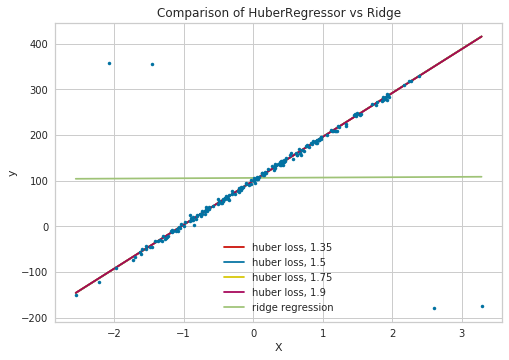

In [283]:
from sklearn.model_selection import train_test_split

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit the huber regressor over a series of epsilon values.
colors = ['r-', 'b-', 'y-', 'm-']

x = np.linspace(X.min(), X.max(), 7)
epsilon_values = [1.35, 1.5, 1.75, 1.9]
for k, epsilon in enumerate(epsilon_values):
    huber = HuberRegressor(alpha=0.0, epsilon=epsilon)
    huber.fit(X_train, y_train)
    coef_ = huber.coef_ * x + huber.intercept_
    plt.plot(x, coef_, colors[k], label="huber loss, %s" % epsilon)

# Fit a ridge regressor to compare it to huber regressor.
ridge = Ridge(alpha=100.0, random_state=0, normalize=True)
ridge.fit(X_train, y_train)
coef_ridge = ridge.coef_
coef_ = ridge.coef_ * x + ridge.intercept_
plt.plot(x, coef_, 'g-', label="ridge regression")

plt.plot(X, y, 'b.')

plt.title("Comparison of HuberRegressor vs Ridge")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc=0)
plt.show()

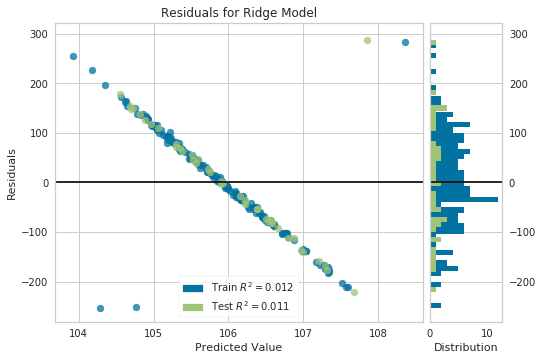

In [284]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

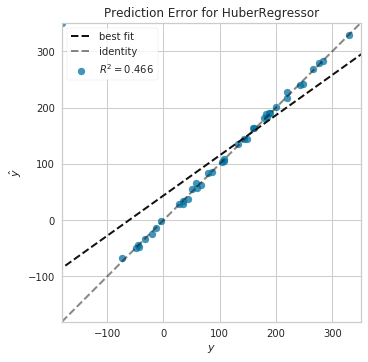

In [285]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(huber)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure